In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the data

In [99]:
data=pd.read_csv('Melbourne_housing_FULL.csv')

In [100]:
df=data.copy()

In [101]:
df.size

731997

In [102]:
df.shape

(34857, 21)

In [103]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

### Here we have total 34857 entries with one int value, 12 float values and 8 object values with total 21 columns 

In [105]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### Here we have null values in price Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount columns

In [106]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [107]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [108]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
df = df[cols_to_use]

In [109]:
df.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Method         34857 non-null  object 
 4   SellerG        34857 non-null  object 
 5   Regionname     34854 non-null  object 
 6   Propertycount  34854 non-null  float64
 7   Distance       34856 non-null  float64
 8   CouncilArea    34854 non-null  object 
 9   Bedroom2       26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13742 non-null  float64
 14  Price          27247 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 4.0+ MB


# Handeling Missing Values

In [111]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [112]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)

### We handeled the missing values in the columns Propertycount, Distance, Bedroom2, Bathroom, Car by filling the missing values with 0

In [113]:
df['Landsize']=df['Landsize'].fillna(df['Landsize'].mean())
df['BuildingArea']=df['BuildingArea'].fillna(df['BuildingArea'].mean())

### We handeled the missing values in the columns Landsize and BuildingArea by filling the missing values with mean

In [114]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

### Drop NA values of price because price is our target value

In [116]:
df.dropna(inplace=True)

In [117]:
df.shape

(27244, 15)

In [118]:
df.size

408660

In [119]:
for colname,colvals in df.iteritems():
    if df[colname].dtype!=object and colname!='Price':
        Q1=df[colname].quantile(q=0.25)
        Q3=df[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        df.loc[(df[colname]<low) | (df[colname]>up) ,colname]=df[colname].median()
    else:
        continue

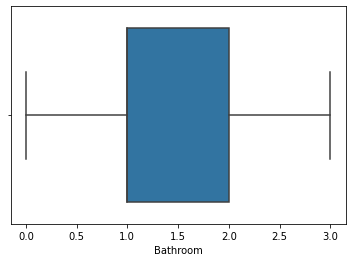

In [120]:
sns.boxplot(df['Bathroom']);

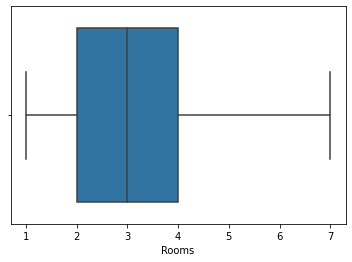

In [121]:
sns.boxplot(df['Rooms']);

# Handeling categorical Values

In [122]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,160.2564,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,160.2564,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [123]:
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,160.2564,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,160.2564,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


# without standardization

In [124]:
x=df.drop('Price', axis=1)
y=df['Price']

In [125]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

In [126]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()

In [127]:
mlr.fit(train_x,train_y)

LinearRegression()

# Prediction

In [128]:
list(zip(x,mlr.coef_))

[('Rooms', 246968.7161490826),
 ('Propertycount', 0.9310404430979133),
 ('Distance', -33009.12053195642),
 ('Bedroom2', -30692.102493665025),
 ('Bathroom', 64938.92988333617),
 ('Car', 33321.02249443144),
 ('Landsize', 350.3486001183628),
 ('BuildingArea', 5747.702640164469),
 ('Suburb_Aberfeldie', 312649.61649645027),
 ('Suburb_Airport West', -90294.94336228227),
 ('Suburb_Albanvale', -78828.496677676),
 ('Suburb_Albert Park', 357473.3263817092),
 ('Suburb_Albion', 108531.29078960945),
 ('Suburb_Alphington', 237287.90384551632),
 ('Suburb_Altona', 151682.79860239098),
 ('Suburb_Altona Meadows', -177488.4584369102),
 ('Suburb_Altona North', -138497.29152368652),
 ('Suburb_Ardeer', -83767.38704970443),
 ('Suburb_Armadale', 174068.36372843393),
 ('Suburb_Ascot Vale', -44110.73148756462),
 ('Suburb_Ashburton', -38252.301124439866),
 ('Suburb_Ashwood', -58444.59413387293),
 ('Suburb_Aspendale', 306547.903612525),
 ('Suburb_Aspendale Gardens', -33594.73479992264),
 ('Suburb_Attwood', -33723

In [129]:
mlr.intercept_

-682281.6385703825

In [130]:
y_train_pred=mlr.predict(train_x)
y_test_pred=mlr.predict(test_x)

# Preformance

In [131]:
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(test_y,y_test_pred))
print('Mean squared error:',metrics.mean_squared_error(test_y,y_test_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(test_y,y_test_pred)))
print('R-2:',metrics.r2_score(test_y,y_test_pred))

Mean absolute error: 232174.19253448653
Mean squared error: 130210062862.61484
Root mean squared error: 360846.31474162906
R-2: 0.6845903534926461


# Standardization

In [132]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
std=scaler.fit_transform(x)

In [133]:
from sklearn.model_selection import train_test_split
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(std,y,test_size=0.2,random_state=42)

In [134]:
from sklearn.linear_model import LinearRegression
mlr_s=LinearRegression()

In [135]:
mlr_s.fit(x_train_s,y_train_s)

LinearRegression()

# Prediction

In [136]:
print('Intercept:',mlr_s.intercept_)
print('Coefficient:',mlr_s.coef_)

Intercept: -3.04148068758713e+16
Coefficient: [ 2.31180683e+05  2.53939775e+18 -1.66984691e+05 -4.90343539e+04
  5.54489481e+04  3.41952318e+04  7.50443424e+04  6.09482417e+03
 -4.82577806e+16 -1.65061644e+17  1.93045177e+15  3.23771276e+17
 -4.10386102e+15  4.44325731e+17 -1.11963697e+18 -5.95208697e+17
 -1.27354775e+18  1.49518450e+16 -1.38640479e+17 -3.83451339e+17
  1.74729440e+17  4.57134935e+17  3.86446307e+17  3.01496403e+17
  1.55475778e+17 -2.13865975e+17  2.37982640e+17  2.51749744e+17
  9.29347302e+16 -3.91561971e+16 -5.94657118e+17  1.56276377e+17
  1.40266826e+16  2.17246442e+16  2.36036355e+17  1.73636304e+17
  2.23067500e+17 -6.93092033e+16  3.92227520e+17  1.94402852e+17
  7.44932056e+17  6.58426185e+17  6.04382486e+17  2.62481694e+17
 -7.82064375e+17  1.13878355e+17  9.14404118e+17 -1.85478294e+17
  1.41561947e+17  9.24763935e+16  3.21486123e+17  2.70324707e+17
 -5.45949064e+17  2.59947981e+16  5.90975610e+17  6.86417661e+17
  7.09587230e+17 -2.78912524e+16  1.34103852

In [137]:
y_train_pred_s=mlr_s.predict(x_train_s)
y_test_pred_s=mlr_s.predict(x_test_s)

# Performance

In [138]:
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(y_test_s,y_test_pred_s))
print('Mean squared error:',metrics.mean_squared_error(y_test_s,y_test_pred_s))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test_s,y_test_pred_s)))
print('R-2:',metrics.r2_score(y_test_s,y_test_pred_s))

Mean absolute error: 1.334961830778688e+18
Mean squared error: 7.572701233464275e+38
Root mean squared error: 2.751854144656703e+19
R-2: -1.8343459534866286e+27
